### Importing Packages

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Loading Images

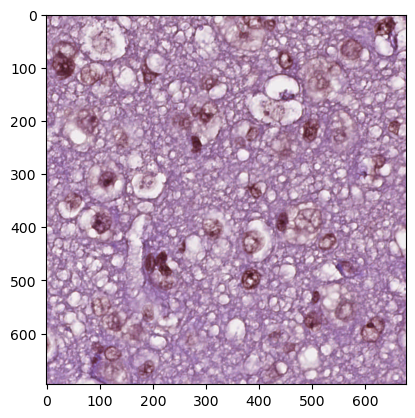

In [157]:
img = cv2.imread("image.png")
plt.imshow(img)
plt.show()

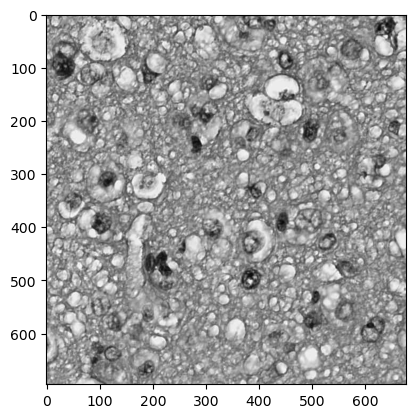

In [158]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [159]:
median = cv2.medianBlur(gray, 1)

In [160]:
ret, bin_img = cv2.threshold(median,
                             0, 255, 
                             cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

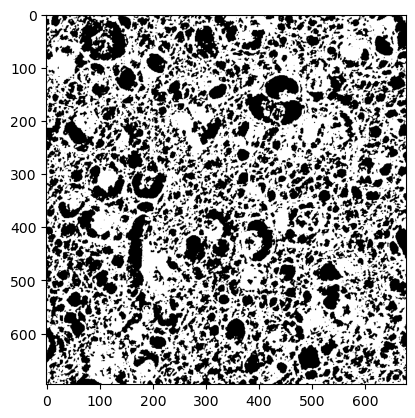

In [161]:
plt.imshow(bin_img,cmap='gray')

In [162]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_img = cv2.morphologyEx(bin_img, 
                           cv2.MORPH_OPEN,
                           kernel,
                           iterations=2)

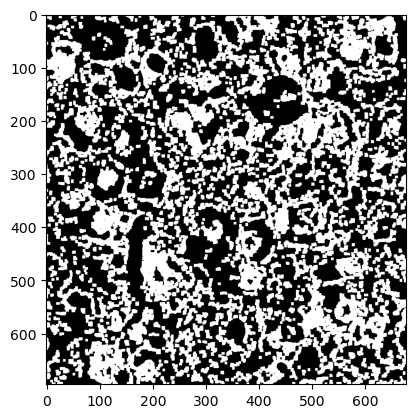

In [163]:
plt.imshow(bin_img,cmap='gray')

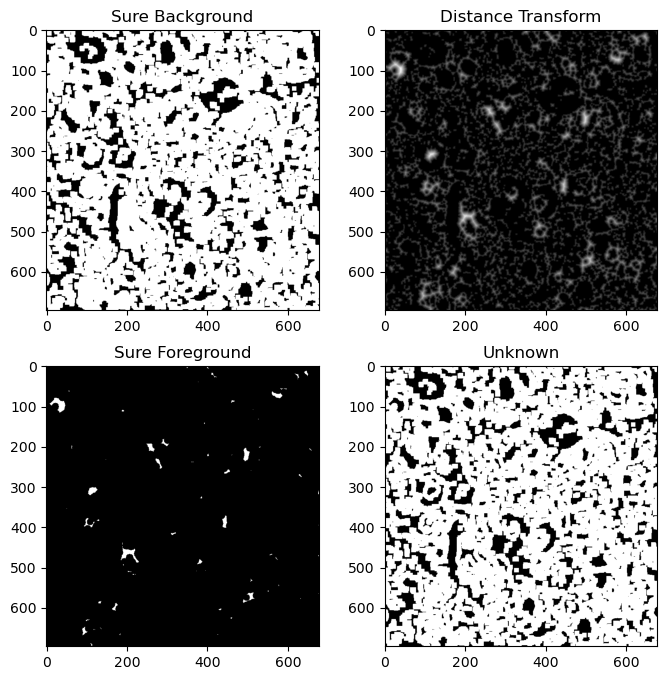

In [164]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# sure background area
sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
axes[0, 0].imshow(sure_bg, cmap='gray')
axes[0, 0].set_title('Sure Background')

# Distance transform
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
axes[0, 1].imshow(dist, cmap='gray')
axes[0, 1].set_title('Distance Transform')

# foreground area
ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
axes[1, 0].imshow(sure_fg, cmap='gray')
axes[1, 0].set_title('Sure Foreground')

# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)
axes[1, 1].imshow(unknown, cmap='gray')
axes[1, 1].set_title('Unknown')

plt.show()

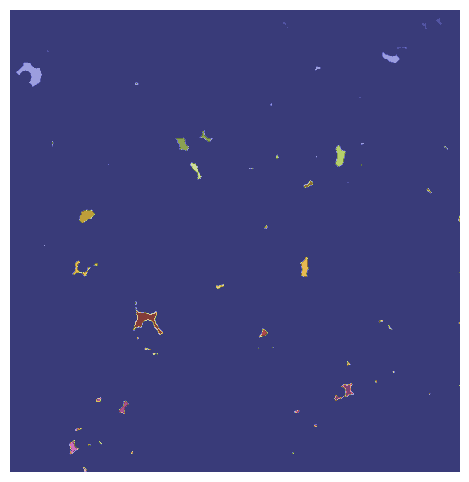

In [165]:
ret, markers = cv2.connectedComponents(sure_fg)
 
# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0
 
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

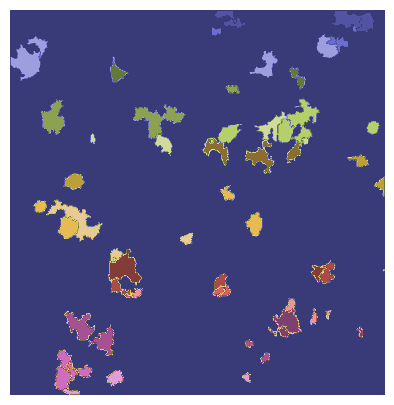

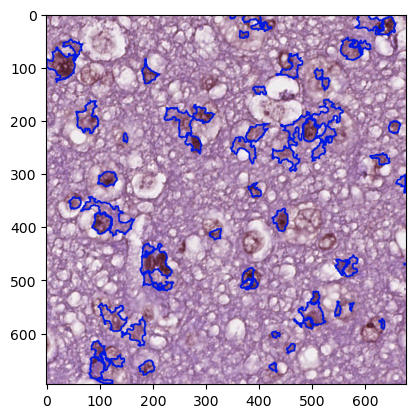

In [166]:
markers = cv2.watershed(img, markers)
 
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()
 
 
labels = np.unique(markers)
 
coins = []
for label in labels[2:]:  
 
# Create a binary image in which only the area of the label is in the foreground 
#and the rest of the image is in the background   
    target = np.where(markers == label, 255, 0).astype(np.uint8)
   
  # Perform contour extraction on the created binary image
    contours, hierarchy = cv2.findContours(
        target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    coins.append(contours[0])
 
# Draw the outline
img = cv2.drawContours(img, coins, -1, color=(0, 23, 223), thickness=2)
plt.imshow(img)

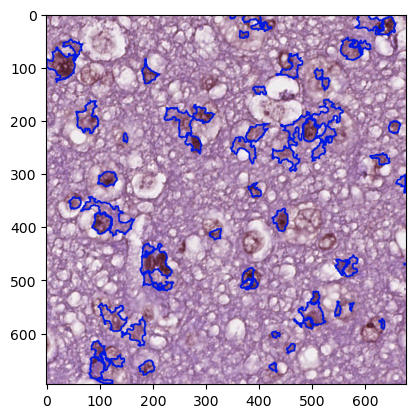

In [167]:
img_gt = cv2.imread("image_gt.png")
plt.imshow(img)
plt.show()

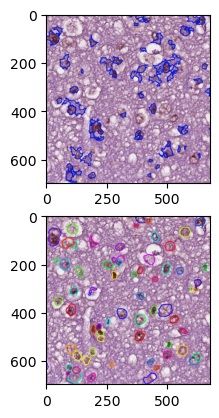

In [171]:
plt.subplot(2, 1, 1)
plt.imshow(img)


plt.subplot(2, 1, 2)
plt.imshow(img_gt)

plt.show()

### HSV Segmentation

In [169]:
def segment_by_hsv(image, lower_range, upper_range):
    # Convert BGR image to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define lower and upper bounds for thresholding
    lower_bound = np.array(lower_range)
    upper_bound = np.array(upper_range)
    
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
    
    return mask

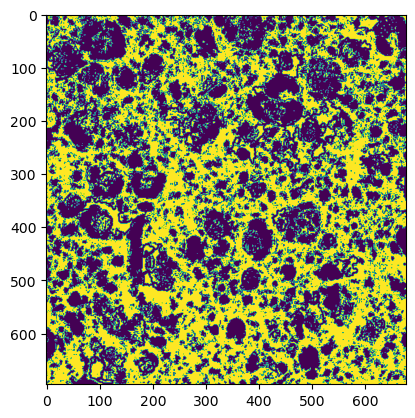

In [170]:
mask = segment_by_hsv(img,[140,50,50],[180,255,255])
plt.imshow(mask)